In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as st

In [2]:
data = pd.read_csv('Divar.csv')
data.head()

/tmp/ipykernel_10849/460707437.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Divar.csv')


,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# removing first column(Unnamed 0)
data.drop('Unnamed: 0', axis=1, inplace=True)

## Statistical Analysis

### Descriptive Stats.1

<div dir="rtl"> 
توزیع آگهی‌های موجود در دسته‌های مختلف را برای دسته‌بندی سطح دو و سطح سه رسم کنید.
</div>

In [ ]:
# cat2_slug groups
data.cat2_slug.unique()

array(['temporary-rent', 'residential-sell', 'residential-rent',
       'commercial-rent', 'commercial-sell', 'real-estate-services'],
      dtype=object)

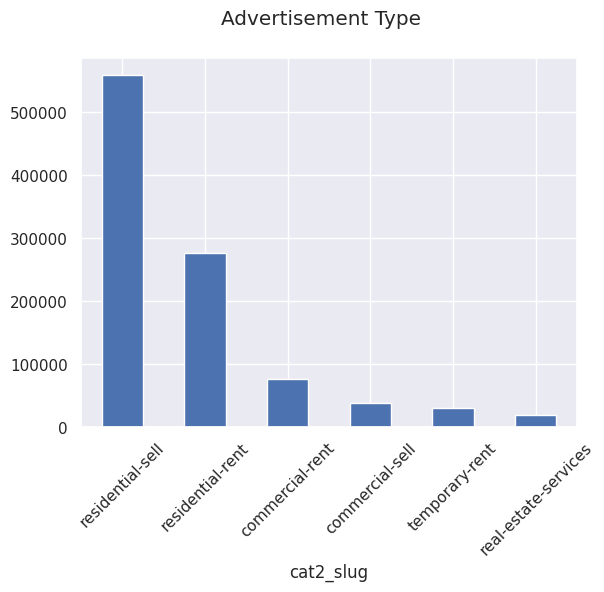

In [5]:
# distribution of cat2_slug
sns.set_theme()
data.cat2_slug.value_counts().plot.bar()
plt.suptitle('Advertisement Type')
plt.xticks(rotation=45)
plt.show()

In [6]:
# handling the missing value of cat3_slug
data.cat3_slug.fillna('shop-rent', inplace=True)

/tmp/ipykernel_8597/2216133855.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.cat3_slug.fillna('shop-rent', inplace=True)


<font color='green'> reason and strategy for handling the missing value explained in: EDA.ipynb > Column cat3_slug </font>

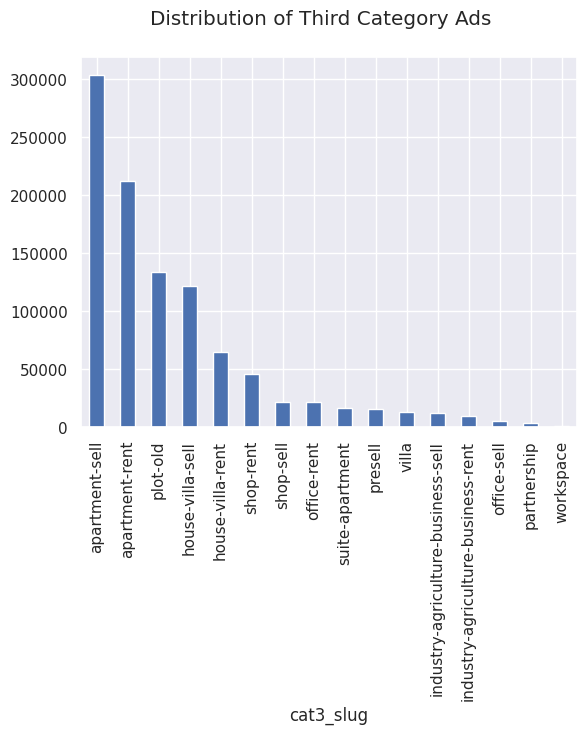

In [7]:
# distribution of cat3_slug 
data.cat3_slug.value_counts().plot.bar()
plt.suptitle('Distribution of Third Category Ads')
plt.show()

<font color='red'> Proper Suptitles for plots!!! </font>

### Descriptive Stats.2

<div dir="rtl"> 
هیستوگرام سال ساخت را رسم کنید.
</div>

In [ ]:
# construction year unique values
data.construction_year.unique()

array([nan, '۱۳۸۴', '۱۴۰۱', '۱۴۰۰', '۱۴۰۳', '۱۳۸۹', '۱۳۹۵', '۱۳۹۳',
       '۱۳۹۶', '۱۳۸۷', '۱۳۸۵', '۱۳۹۰', '۱۳۹۸', '۱۴۰۲', '۱۳۸۸',
       'قبل از ۱۳۷۰', '۱۳۹۲', '۱۳۸۳', '۱۳۹۴', '۱۳۹۱', '۱۳۸۰', '۱۳۷۸',
       '۱۳۷۵', '۱۳۹۷', '۱۳۹۹', '۱۳۸۲', '۱۳۸۶', '۱۳۷۹', '۱۳۷۲', '۱۳۷۴',
       '۱۳۷۶', '۱۳۷۷', '۱۳۷۱', '۱۳۸۱', '۱۳۷۳'], dtype=object)

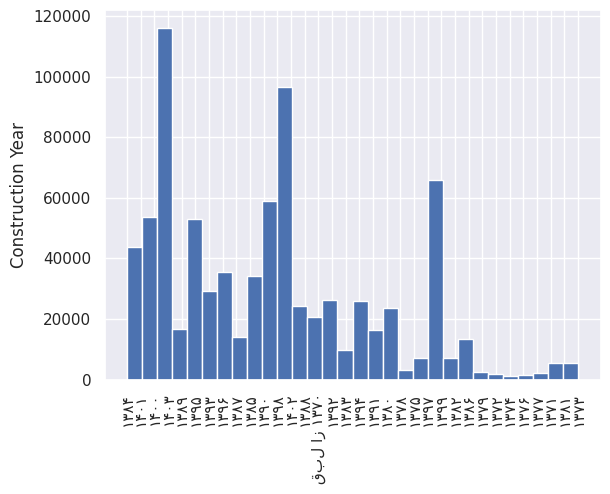

In [8]:
# construction year histogram
plt.Figure(figsize=(16, 8))
data.construction_year.hist(bins=30)
plt.ylabel('Construction Year')
plt.xticks(rotation=90)
plt.show()

In [13]:
# function to convert persian digits to english ones
# replacing 'before 1370' with 1370
def convert_construction_year(x):
    if x == 'قبل از ۱۳۷۰':
        return 1370
    elif x == float('nan'):
        return x
    else:
        x = str(x)
        persian_digits ='۱۲۳۴۵۶۷۸۹۰١٢٣٤٥٦٧٨٩٠'
        english_digits ='12345678901234567890'
        translation_table = str.maketrans(persian_digits, english_digits)
        x = float(x.translate(translation_table))
        return x



In [14]:
# type conversion in construction_year
data['construction_year'] = data.construction_year.apply(convert_construction_year).astype('Int64')

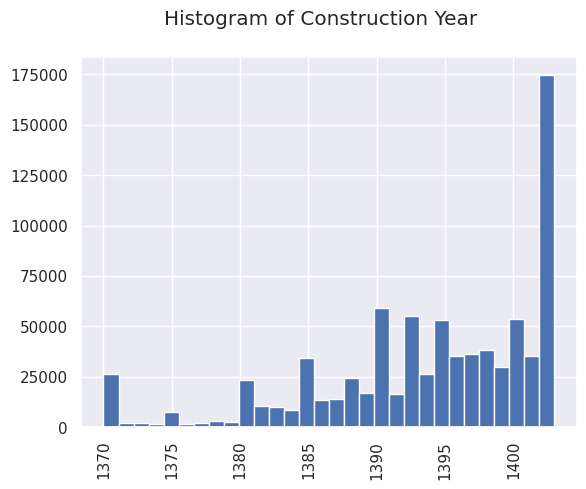

In [19]:
# construction_year distribution after conversion 
data['construction_year'].hist(bins=30)
plt.suptitle('Histogram of Construction Year')
plt.xticks(rotation=90)
plt.show()

1370 means 1370 and years before

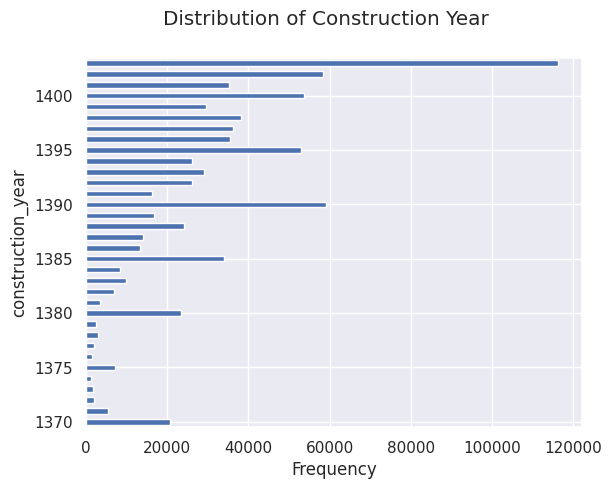

In [ ]:
# construction_year histogram after conversion 
fig, ax = plt.subplots()
data['construction_year'].value_counts().sort_index().plot.barh(ax=ax)
plt.suptitle('Distribution of Construction Year')
plt.xlabel('Frequency')
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=5)) # adjust spacing between y-ticks (5 years)
plt.show()

<font color='red'> This column has 18% missing data which weren't handled for this task. </font>

### Descriptive Stats.3

<div dir="rtl"> 
تعداد آگهی‌های منتشر شده در ماه‌های مختلف را برای فروش و اجاره بررسی کنید. آیا تعداد آگهی‌های فروش و اجاره در زمان‌های مشخصی از سال افزایش چشم‌گیری داشته است؟
</div>

What does 'real-estate-services' mean in this column(cat2_slug)?

In [ ]:
data[data['cat2_slug'] == 'real-estate-services'].head()['title']

125    ۸۰ متر نو سازخیابان سعدی/ملارد/سراسیاب/املاک م...
127                                64متری پیش فروش واوان
203                                       ۲۱۰/متر/مشارکت
243                                ۸۵ متر الهیه پیش فروش
435                    فروش آپارتمان دو خوابه فاز ۱ صدرا
Name: title, dtype: object

In [ ]:
data[data['cat2_slug'] == 'real-estate-services'].head()['description']

125    ۸۰ متر نوساز کلید نخورده\n✅دوخواب\n✅روب نما\n✅...
127    پیش فروش آپارتمان✅\n\nمحدوده: واوان✓هشت بهشت✅\...
203    ۲۱۰ متر با بر ۱۰\nیبر\n۱۹۰ متر پیشروی\nدرصد ۶۰...
243    سلام احترام \nواحد ۸۵ متری سر جلو \nآفتابگیر \...
435    پیش فروش آپارتمان دو خوابه فاز ۱ سند ملکی\nموق...
Name: description, dtype: object

Is it related to user_type?

In [ ]:
data[data['cat2_slug'] == 'real-estate-services']['user_type'].value_counts()

user_type
مشاور املاک    6055
شخصی            475
Name: count, dtype: int64

Check if real-estate-services contain both rent and sell

In [ ]:
real_estate_data = data[data['cat2_slug'] == 'real-estate-services']
print(real_estate_data.title.str.contains('اجاره').any())
print(real_estate_data.title.str.contains('فروش').any())

True
True


number of ads for rent and sell in 'real-estate-services':

In [ ]:
print('number of rent ads in real-estate-services: ', real_estate_data.title.str.contains('اجاره').sum())
print('number of sell ads in real-estate-services: ', real_estate_data.title.str.contains('فروش').sum())

number of rent ads in real-estate-services:  35
number of sell ads in real-estate-services:  8864


Can 'real-estate-services' be discarded?

In [ ]:
# what percentage of data is 'real-estate-services'?
len(real_estate_data) / len(data) * 100

1.9403

<font color='green'>Since real-estate-services makes up only 2 percent of data and contains ads for both rent and sell,   
This portion of data is discarded for this task.</font>

In [10]:
# conversion of created month column to datetime
data['created_at_month'] = pd.to_datetime(data['created_at_month'])
# simplifying date to year and month (since we only have data for the first day of each month)
data['created_at_month'] = data['created_at_month'].dt.to_period('M')

In [15]:
# sell data
sell_data = data[data.cat2_slug.str.contains('sell')]
sell_ads_no = sell_data.groupby('created_at_month').size()

# rent data
rent_data = data[data.cat2_slug.str.contains('rent')]
rent_ads_no = rent_data.groupby('created_at_month').size()



Text(0, 0.5, 'Rent Ads')

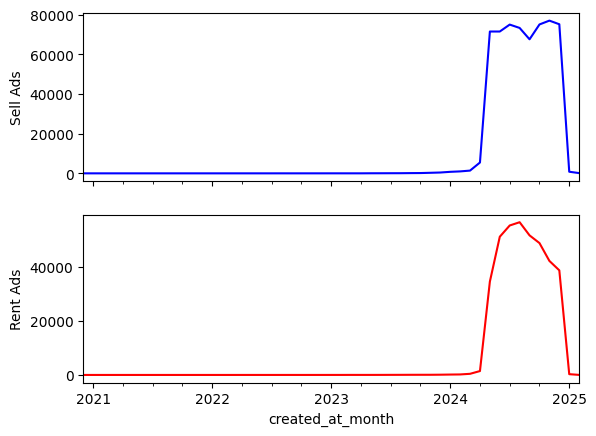

In [25]:
# plotting 1
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
sell_ads_no.plot.line(ax=ax[0], color='blue')
ax[0].set_ylabel('Sell Ads')
rent_ads_no.plot.line(ax=ax[1], color='red')
ax[1].set_ylabel('Rent Ads')

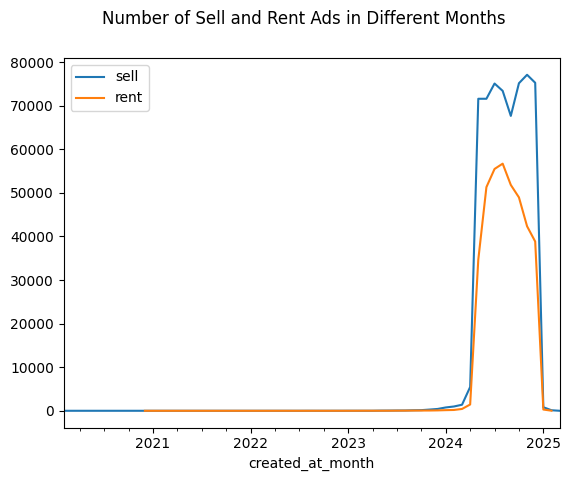

In [29]:
# plotting 2
sell_ads_no.plot.line()
rent_ads_no.plot.line()
plt.legend(['sell', 'rent'])
plt.suptitle('Number of Sell and Rent Ads in Different Months')
plt.show()

<font color='red'> Answer the question </font>

### Descriptive Stats.4

<div dir="rtl"> 
توزیع قیمت فروش‌(price_value) را برای دسته‌بندی‌های سطح سه در یک نمودار رسم کنید.
</div>

<Axes: xlabel='price_value', ylabel='cat3_slug'>

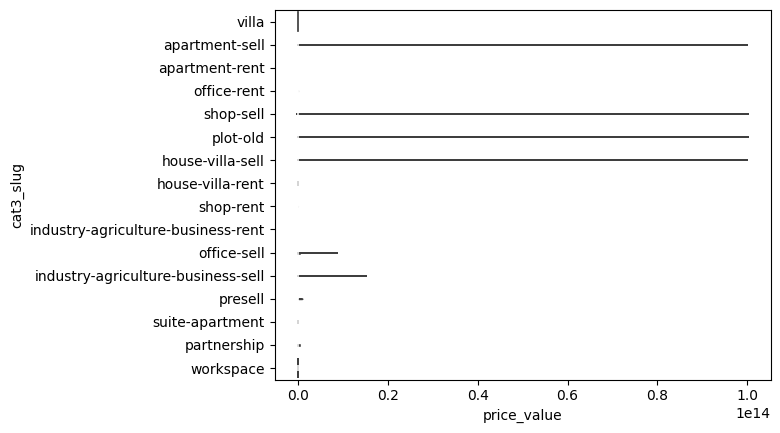

In [ ]:
#sns.violinplot(data=data, x='price_value', y='cat3_slug')

### Descriptive Stats.5

<div dir="rtl"> 
بر روی نقشه‌ی جغرافیایی heatmap آگهی‌های هر منطقه را رسم کنید. تراکم آگهی‌ها کدام منطقه بیشتر است؟
</div>

### Descriptive Stats.6

<div dir="rtl"> 
ترند میانگین قیمت اجاره بر حسب ماه‌های قرار گرفتن آگهی‌ها رسم کنید.(دقت کنید که ماه‌ها باید به تاریخ شمسی و خوانا باشند.)
</div>

### Descriptive Stats.7

<div dir="rtl"> 
در طول زمان قیمت‌های اسمی افزایش پیدا می‌کنند اما این افزایش لزوما به معنی بالارفتن ارزش واقعی ملک نیست و می‌تواند ناشی از تورم باشد. به ازای میانگین مبلغ قیمت(price_value) در سال‌های ۱۴۰۰ تا ۱۴۰۳ قیمت حقیقی را محاسبه کنید و بررسی کنید ترند قیمت حقیقی چگونه است. 
</div>

### Descriptive Stats.8

<div dir="rtl"> 
 ماتریس هم‌بستگی را برای مبلغ قیمت، متراژ زمین، زیربنا، ظرفیت نفرات، تعداد اتاق‌ها و طول و عرض جغرافیایی رسم نمایید.
</div>

### Descriptive Stats.9

<div dir="rtl"> 
می‌خواهیم بررسی کنیم خانه‌هایی که دارای بالکن، آسانسور، نگهبان، باربیکیو و استخر هستند عمدتا در کدام مناطق قرار دارند. با نمودار مناسب این موضوع را نشان دهید.
</div>

### Hypothesis Testing.1

<div dir="rtl"> 
با توجه به رشد مهاجرت افراد از شهر‌های کوچکتر به کلان‌شهر‌ها و تراکم جمعیت در این نواحی، تصور می‌شود که میانگین مساحت خانه‌های مسکونی در کلان‌شهرها نسبت به شهر‌های کوچک و روستاها کمتر است. آیا مجموعه داده‌ این فرضیه را پشتیبانی می‌کند؟(برای دسته‌بندی شهرها به کلان‌شهر و شهر کوچک می‌توانید از این مجموعه داده استفاده کنید.) 
</div>

In [4]:
city_classes = pd.read_csv('iran_city_classification.csv')
city_classes.head()

,نام شهر,دسته‌بندی
0,karaj,کلان‌شهر
1,tehran,کلان‌شهر
2,mashhad,کلان‌شهر
3,ahvaz,کلان‌شهر
4,kermanshah,کلان‌شهر


In [6]:
# rename columns
city_classes.columns = ['name', 'class']


In [9]:
# missing values in city dataset
city_classes.isna().sum()

name     0
class    0
dtype: int64

In [10]:
# distribution 
city_classes.groupby('class').size()

class
شهر کوچک    231
کلان‌شهر      9
dtype: int64

In [13]:
# check if we have information for all the cities of main dataset
data.city_slug.nunique()

421

In [4]:
data.city_slug.unique()

array(['karaj', 'tehran', 'mashhad', 'ahvaz', 'kermanshah',
       'mahdasht-city', 'pardis-city', 'foolad-shahr', 'rasht', 'mahabad',
       'shiraz', 'gonabad', 'azna', 'andisheh-new-town', 'chamestan',
       'babol', 'arak', 'pishva', 'tabriz', 'urmia', 'nur', 'kish',
       'nasimshahr', 'amol', 'yasuj', 'isfahan', 'ilam', 'najafabad',
       'yazd', 'pakdasht-city', 'bandar-ganaveh', 'chalus', 'sabzevar',
       'eslamshahr', 'dezful', 'mohammadieh', 'lavasan-city', 'sirjan',
       'Kordkuy', 'hamedan', 'qods-city', 'shandiz-city', 'mahmudabad',
       'aran-va-bidgol', 'bandar-abbas', 'bandar-kangan', 'kiashahr',
       'izadshahr', 'bushehr', 'tuyserkan', 'khoram-abad', 'qazvin',
       'khorramabad', 'kashan', 'nowshahr', 'hashtgerd-city', 'behshahr',
       'sanandaj', 'masal', 'shahin-dej', 'vahidieh', 'parand-city',
       'shush', 'mobarakeh', 'neyshabur', 'kerman', 'rudehen',
       'torbat-jam', 'polsefid', 'salman-shahr', 'saveh', 'shahriar-city',
       'damghan', 'ra

In [ ]:
# check if we have information for all the cities of main dataset
for city in data.city_slug.unique():
    if city not in city_classes.name.values:
        print(f'Information for {city} does not exist!')

Information for mehran does not exist!
Information for fasa-city does not exist!
Information for nurabad does not exist!
Information for raheem-abad does not exist!
Information for langarud does not exist!
Information for khoshkbijar does not exist!
Information for taleqan does not exist!
Information for shahedshahr does not exist!
Information for firuzabad does not exist!
Information for ashkhaneh does not exist!
Information for aleshtar does not exist!
Information for asalem does not exist!
Information for abali does not exist!
Information for marzikola does not exist!
Information for aq-qala does not exist!
Information for bandar-Imam-khomeini does not exist!
Information for mahan does not exist!
Information for norabad does not exist!
Information for harsin does not exist!
Information for ghayen does not exist!
Information for galikesh does not exist!
Information for khan-bin does not exist!
Information for farahabad does not exist!
Information for mehriz does not exist!
Informatio

since number of cities in main dataset (421) exceeds number of cities in classification data (240), we consider the remaining cities as small towns.

In [7]:
metropolises = city_classes[city_classes['class'] == 'کلان‌شهر']['name']
metropolises

0          karaj
1         tehran
2        mashhad
3          ahvaz
4     kermanshah
10        shiraz
18        tabriz
25       isfahan
81           qom
Name: name, dtype: object

In [ ]:
# check if all city names of main dataset are lowercase
data[data.city_slug.str.islower() == False]['city_slug'].unique()

array(['Kordkuy', 'Iranshahr', 'bandar-Imam-khomeini'], dtype=object)

None of the cities in the metropolises list have uppercase letter in the main dataset.   
(all occurences of metropolises in main data are totally lowercase.)

In [8]:
# creating 'city_class' temporary column to divide the dataset
data['city_class'] = data.city_slug.apply(lambda x: 'metropolis' if x in metropolises.values else 'small town')

# percentage of metropolises and small_towns
print(data['city_class'].value_counts(normalize=True) * 100)

# data separation
metroplises_data = data[data['city_class'] == 'metropolis'].copy()
small_town_data = data[data['city_class'] == 'small town'].copy()
 
# dropping temporary column
data.drop('city_class', axis=1, inplace=True)

city_class
small town    53.5201
metropolis    46.4799
Name: proportion, dtype: float64


<font color='green'> 'building_size' is the correct column to use for this task due to small missing percentage (1.96%) compared to 'land_size' which doesn't have enough information(81% missing)</font>

In [9]:
# dropping missing values of building_size
metroplises_data.dropna(subset=['building_size'], inplace=True)
small_town_data.dropna(subset=['building_size'], inplace=True)

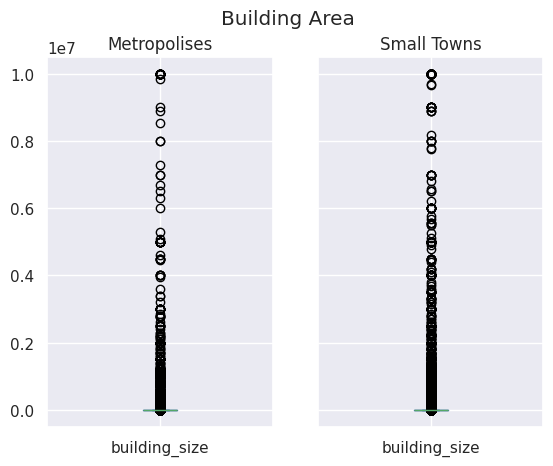

In [34]:
# distribution of building_size
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
metroplises_data.building_size.plot.box(ax=ax[0])
ax[0].set_title('Metropolises')
small_town_data.building_size.plot.box(ax=ax[1])
ax[1].set_title('Small Towns')
plt.suptitle('Building Area')
plt.show()

H0: area in metropolises >= area in small towns   
H1: area in metropolises < area in small towns

In [10]:
# taking samples 
metropolis_mean = list()
small_town_mean = list()
n = 10000
for i in range(n):
    metropolis_sample = metroplises_data.sample(n=30)
    metropolis_mean.append(metropolis_sample['building_size'].mean())
    small_town_sample = small_town_data.sample(n=30)
    small_town_mean.append(small_town_sample['building_size'].mean())

metropolis_mean = np.array(metropolis_mean)
small_town_mean = np.array(small_town_mean)
pvalue = (metropolis_mean >= small_town_mean).sum() / n 
print(f'p-value: {pvalue}')

p-value: 0.2459


In [13]:
metro_sizes = metroplises_data['building_size']
town_sizes = small_town_data['building_size']

observed_diff = metro_sizes.mean() - town_sizes.mean()  # Should be negative if metro < town

combined = pd.concat([metro_sizes, town_sizes], ignore_index=True)
n_metro = len(metro_sizes)
n_iter = 3000

diffs = []

for _ in range(n_iter):
    shuffled = combined.sample(frac=1, replace=False).reset_index(drop=True)
    perm_metro = shuffled[:n_metro]
    perm_town = shuffled[n_metro:]
    diff = perm_metro.mean() - perm_town.mean()
    diffs.append(diff)

diffs = np.array(diffs)

# One-sided p-value: proportion of permuted diffs <= observed_diff
p_value = (diffs <= observed_diff).mean()

print(f"Observed difference: {observed_diff:.4f}")
print(f"P-value (metropolis < small town): {p_value:.4f}")


Observed difference: -3791.5380
P-value (metropolis < small town): 0.0000


In [16]:
len(metropolis_mean)

1000

برای تحلیل های آماری پیش پردازش نیازه؟   
مثلا داده های پرت و گمشده

### Hypothesis Testing.2

<div dir="rtl"> 
معمولا این جمله را می‌شنویم که «قدیما خونه‌ها دلبازتر بود!» برای بررسی این فرضیه، آیا میانگین مساحت خانه‌های قدیمی‌ساخت نسبت به خانه‌های جدید ساخت بیشتر است؟( خانه‌های قدیمی‌ساخت را خانه‌هایی در نظر بگیرید که قبل از سال ۹۶ ساخته شده‌اند.)
</div>

### Hypothesis Testing.3

<div dir="rtl"> 
داشتن سند تجاری (یا هر نوع سند ملکی) در املاک به این معنی است که سند مالکیت معتبر، رسمی و قانونی برای ملک تجاری دارید. این سند نشان می‌دهد که شما صاحب قانونی ملک تجاری هستید و می‌توانید از حقوق مالکیت آن استفاده کنید. بررسی کنید که آیا داشتن سند تجاری(has_business_deed) بر میانگین قیمت فروش ملک تجاری تاثیر معناداری دارد؟
</div>

### Hypothesis Testing.4

<div dir="rtl"> 
در دسته‌بندی امکانات موجود در آگهی‌ها می‌توانیم آنها را به دو دسته‌ی امکانات لاکچری(استخر، باربیکیو، سونا، جکوزی) و امکانات غیر لاکچری تقسیم کنیم. فرضیه‌ی ما این است که میانگین مبلغ قیمت برای وجود ویژگی‌های لاکچری افزایش چشم‌گیری دارد. اما آیا این میانگین برای وجود امکانات غیرلاکچری نیز تفاوت معناداری دارد؟
</div>